In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/test.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/sample_submission.csv


In [2]:
#  Team - EE258_F19_DJAP

In [3]:
# Best Performing Model

In [4]:
# ANIKET PHATAK
# DHANANJAY BAJPAI

In [5]:
# necessary imports

In [6]:
%matplotlib inline
import seaborn as sns
from keras.models import Sequential, load_model
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU
from keras.callbacks import ModelCheckpoint,History,EarlyStopping,LearningRateScheduler
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam, Adadelta, RMSprop

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib
matplotlib.rcParams["backend"] = "TkAgg"

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Using TensorFlow backend.


/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/test.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/sample_submission.csv


In [7]:
# Load Data

In [8]:
data = pd.read_csv('/kaggle/input/Kannada-MNIST/train.csv')
print(data.shape)

(60000, 785)


In [9]:
data. head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

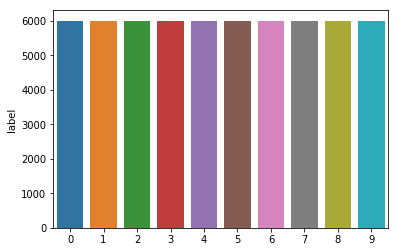

In [11]:
y=data.label.value_counts()
sns.barplot(y.index,y)

In [12]:
"""
helper function to show a number of randomly selected images 
belonging either to a specified label or selected across all labels
"""

def show_random_images(images, num=10, label=None):

    # generating images' subsample if label specified
    if label is not None:
        images = images[images.label == label]
    
    fig, axs = plt.subplots(num, figsize=(1.25, num * 2.5))
    
    for i in range(num):
    
        rnd = np.random.randint(len(images))
    
        # getting image data and splitting between label and pixels' vector
        img_data = np.array(images.iloc[rnd], dtype='uint8')    
        img_label = img_data[0]
        img_pixels = img_data[1:]
        
        # reshaping image to 2D array
        img_shape = (int(np.sqrt(img_pixels.shape[0])), int(np.sqrt(img_pixels.shape[0])))
        img_array = img_pixels.reshape(img_shape)
        
        title = 'Image {} / labelled {}'.format(rnd, img_label)
        
        axs[i].imshow(img_array, alpha=0.66, cmap='gray')
        axs[i].set_title(title)

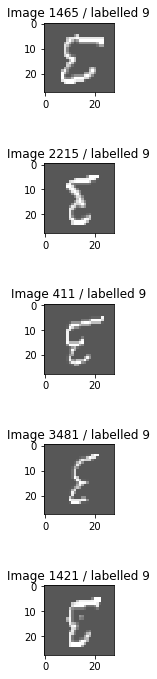

In [13]:
show_random_images(data, num=5, label=9)

In [14]:
test_data = pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')
print(test_data.shape)

(5000, 785)


In [15]:
test_data

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,4996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,4997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,4998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Divide data into training and validation sets**


In [16]:
train = data[:]
val = data[50000:]
train_label = np.float32(train.label)
val_label = np.float32(val.label)
train_image = np.float32(train[train.columns[1:]])
val_image = np.float32(val[val.columns[1:]])
test_image = np.float32(test_data[test_data.columns[1:]])
print('train shape: %s'%str(train.shape))
print('val shape: %s'%str(val.shape))
print('train_label shape: %s'%str(train_label.shape))
print('val_label shape: %s'%str(val_label.shape))
print('train_image shape: %s'%str(train_image.shape))
print('val_image shape: %s'%str(val_image.shape))
print('test_image shape: %s'%str(test_image.shape))

train shape: (60000, 785)
val shape: (10000, 785)
train_label shape: (60000,)
val_label shape: (10000,)
train_image shape: (60000, 784)
val_image shape: (10000, 784)
test_image shape: (5000, 784)


In [17]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 10,
    horizontal_flip = False,
    zoom_range = 0.15)

In [18]:
# one-hot coding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,categories='auto')
yy = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]
encoder.fit(yy)
# transform
train_label = train_label.reshape(-1,1)
val_label = val_label.reshape(-1,1)

train_label = encoder.transform(train_label)
val_label = encoder.transform(val_label)

print('train_label shape: %s'%str(train_label.shape))
print('val_label shape: %s'%str(val_label.shape))

train_label shape: (60000, 10)
val_label shape: (10000, 10)


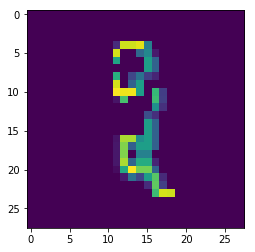

(784,)
train_image shape: (60000, 28, 28, 1)
train_image shape: (60000, 28, 28, 1)
val_image shape: (10000, 28, 28, 1)


In [19]:
plt.imshow(train_image[13].reshape(28,28))
plt.show()
print(train_image[13].shape)

train_image = train_image/255.0
val_image = val_image/255.0
test_image = test_image/255.0

train_image = train_image.reshape(train_image.shape[0],28,28,1)
val_image = val_image.reshape(val_image.shape[0],28,28,1)
test_image = test_image.reshape(test_image.shape[0],28,28,1)
print('train_image shape: %s'%str(train_image.shape))

print('train_image shape: %s'%str(train_image.shape))
print('val_image shape: %s'%str(val_image.shape))

In [20]:
model = Sequential()

model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(28, 28, 1),padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(128, kernel_size=3, activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(256, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=5, activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(0.02)))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(Dropout(0.3))
model.add(Dense(512,kernel_regularizer=regularizers.l2(0.02)))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(Dropout(0.3))
model.add(Dense(1024,kernel_regularizer=regularizers.l2(0.02)))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)      

In [21]:
BATCH_SIZE = 64
EPOCHS = 10


In [22]:
model.compile(loss='categorical_crossentropy',optimizer=Adadelta(),metrics=['accuracy'])
# fit data
datagen.fit(train_image)

# training
history = model.fit_generator(datagen.flow(train_image,train_label, batch_size=BATCH_SIZE),
                              epochs = EPOCHS,
                              shuffle=True,
                              validation_data = (val_image,val_label),
                              verbose = 1,
                              steps_per_epoch=train_image.shape[0] // BATCH_SIZE)

Epoch 1/10
937/937 [==============================] - 74s 79ms/step - loss: 1.2283 - accuracy: 0.9239 - val_loss: 0.0992 - val_accuracy: 0.9963
Epoch 2/10
937/937 [==============================] - 67s 71ms/step - loss: 0.1632 - accuracy: 0.9788 - val_loss: 0.0845 - val_accuracy: 0.9961
Epoch 3/10
937/937 [==============================] - 67s 71ms/step - loss: 0.1434 - accuracy: 0.9824 - val_loss: 0.0654 - val_accuracy: 0.9972
Epoch 4/10
937/937 [==============================] - 67s 71ms/step - loss: 0.1171 - accuracy: 0.9863 - val_loss: 0.0616 - val_accuracy: 0.9975
Epoch 5/10
937/937 [==============================] - 67s 71ms/step - loss: 0.1142 - accuracy: 0.9864 - val_loss: 0.0701 - val_accuracy: 0.9973
Epoch 6/10
937/937 [==============================] - 67s 71ms/step - loss: 0.1062 - accuracy: 0.9874 - val_loss: 0.0554 - val_accuracy: 0.9973
Epoch 7/10
937/937 [==============================] - 67s 72ms/step - loss: 0.0988 - accuracy: 0.9879 - val_loss: 0.0464 - val_accuracy:

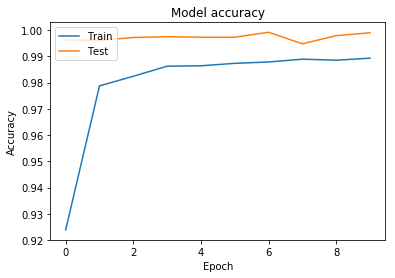

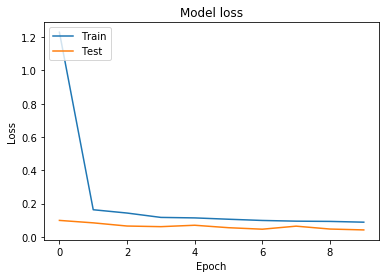

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
test_label = model.predict(test_image)
# label = np.argmax(label_hot,1)
# id_ = np.arange(0,label.shape[0])

In [25]:
label_hot = model.predict(test_image)
label = np.argmax(label_hot,1)
id_ = np.arange(0,label.shape[0])

In [26]:
sim = pd.read_csv('/kaggle/input/Kannada-MNIST/sample_submission.csv')
print(sim.head(10))

   id  label
0   0      5
1   1      5
2   2      5
3   3      5
4   4      5
5   5      5
6   6      5
7   7      5
8   8      5
9   9      5


In [29]:
save = pd.DataFrame({'id':id_,'label':label})
print(save.head(10))
save.to_csv('submission.csv',index=False)

   id  label
0   0      3
1   1      0
2   2      2
3   3      6
4   4      7
5   5      7
6   6      1
7   7      9
8   8      3
9   9      4
